Name: Nedal Mohammad
            Project: Cardio Good Fitness EDA Analysis

Objective - Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

Goals :

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform uni-variate and multi-variate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers

Context - The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

Product - the model no. of the treadmill
Age - in no of years, of the customer
Gender - of the customer
Education - in no. of years, of the customer
Marital Status - of the customer
Usage - Avg. # times the customer wants to use the treadmill every week
Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
Income - of the customer
Miles- expected to run

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First we run neccessary imports and read in the data

In [2]:
#read the data
data=pd.read_csv('CardioGoodFitness.csv')

Now, we can take a peak at the beginning and end of the data

In [3]:
#the first 5 rows of data
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#the last 5 rows of data
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


The data set  has 9 features, 6 of which are numerical and 3 which are categorical. 
From here we can see atleast 2 different product types, also the data appears to be ordered by age/product type. There appears to be a correlation between age and product type, possibly this has to do with the correlation between age and income, but we shall check possible correlations between all other features to determine whether lifestyle differences among age groups influence product choice.

In [5]:
#general statistics on numeric columns
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


From here we can see that our customers are between the age of 18 and 50 with an average age of about 29 years old. Only 25% of the customers are older than 33. Because the count of all numeric columns is the same as the number of rows revealed by shape, we know we are missing no numeric data points. We should still check our 3 categorical columns however for missing values.

Our 'average' customer is a 29 year old with 16 years of education and an income of 54k/year. They believe they have moderate fitness and wish to use a treadmill  3-4 days a week. This person expects to run about 103 miles.

In [6]:
#all column names - aka features
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

These are all of the feature names in the dataset and how each column will be referenced

In [7]:
data.shape

(180, 9)

The data is 180 rows, each row containing 9 columns.

In [8]:
data.dtypes.value_counts() #count the types of data in each column

int64     6
object    3
dtype: int64

6 of the features are numeric already, while 3 are categorical

In [9]:
data.info() #to verify no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


We have now verified a non-null count of 180 for all columns in the dataset, ensuring that there are no missing values. We can now begin a univariate analysis for each feature in the Dataset.

The first thing I will do towards my goal of creating a customer profile/ product type is take the average of each numerical variable grouped by the product purchased.

In [10]:
data.groupby('Product').mean() #take an average of each numeric column after grouping by product purchased

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


This table immediately shows that there is a clear distinction between the types of customers who buy the TM798 and the customers who buy the TM195/TM498.
I will focus on this major distinction for now, and later consider the categorical features in hopes of finding a distinction between customer profiles for the TM195/TM498.

UNIVARIATE ANALYSIS:

<AxesSubplot:xlabel='Product', ylabel='Count'>

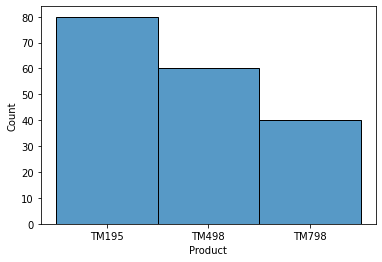

In [11]:
sns.histplot(data['Product']) #histogram showing number of purchases of each machine

This histogram shows that the TM195 appeals to the most customers and is bought the most frequently, followed by the TM498 and then the TM798 is the least bought treadmill model.

C:\Users\nedal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

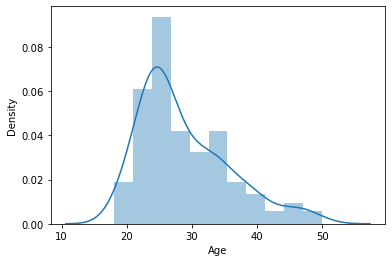

In [12]:
sns.distplot(data['Age'])

<AxesSubplot:>

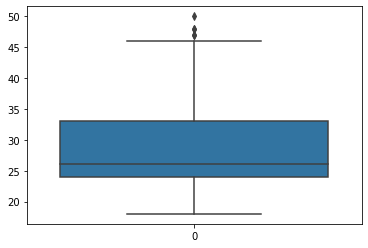

In [13]:
sns.boxplot(data=data['Age'])

Observations: From the histogram and boxplot on the Age feature we can see a negative skew indicating that most people buying treadmills are 35 and younger, with a median age of about 26 or 27

<AxesSubplot:xlabel='Gender', ylabel='Count'>

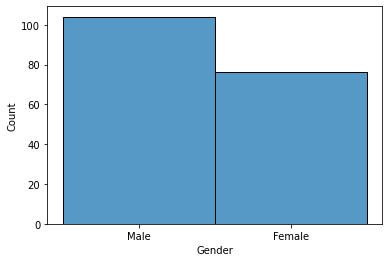

In [14]:
sns.histplot(data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

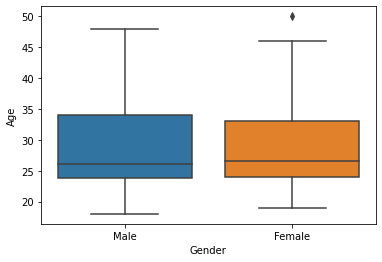

In [15]:
sns.boxplot(x=data['Gender'],y=data['Age'])

Observation: While there are more men than women buying treadmills, their age distributions are very similar

<AxesSubplot:xlabel='Education', ylabel='Count'>

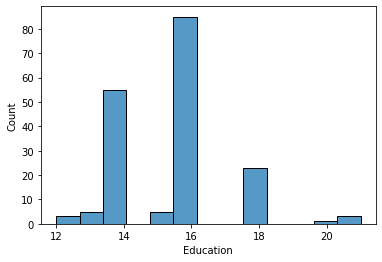

In [16]:
sns.histplot(data['Education'])

<AxesSubplot:>

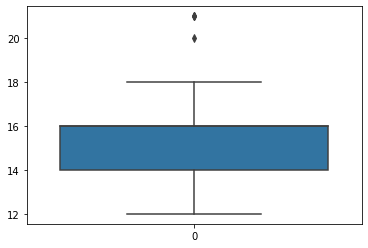

In [17]:
sns.boxplot(data=data['Education'])

From here we can see that most people buying treadmills from this company have either 14 or 16 years of education, however a large chunk also have 18 years of education.

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

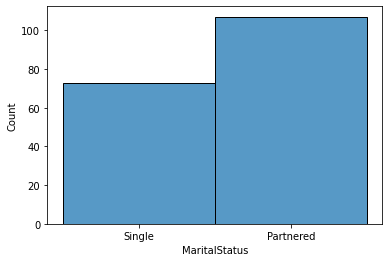

In [18]:
sns.histplot(data['MaritalStatus'])

This histogram tells us more people who buy treadmills from the company are in a relationship as opposed to single.

<AxesSubplot:xlabel='Usage', ylabel='Count'>

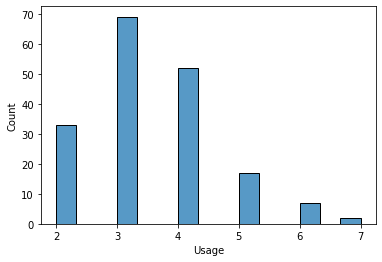

In [19]:
sns.histplot(data['Usage'])

<AxesSubplot:>

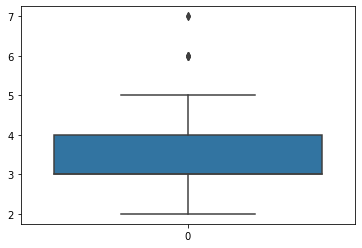

In [20]:
sns.boxplot(data=data['Usage'])

The usage histogram and boxplot tell us that most people are looking to exercise 3-4 days a week and it is actually not common for people to run 6-7 days a week. These people are marked as outliers.

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

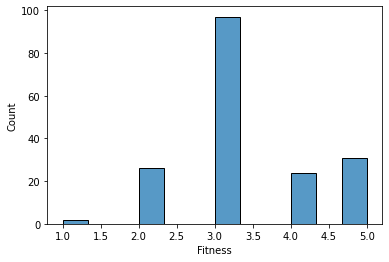

In [21]:
sns.histplot(data['Fitness'])

<AxesSubplot:>

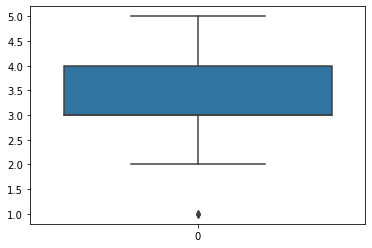

In [22]:
sns.boxplot(data=data['Fitness'])

Observation: most people looking to exercise rate themselves as average fitness, and desire to exercise between 2 and 4 days a week, while people who rate themselves as highly unfit=1 are our outliers.

C:\Users\nedal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

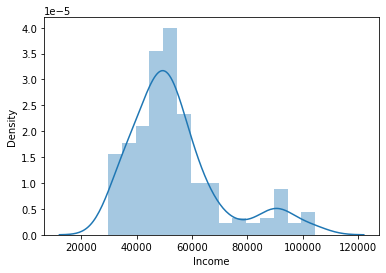

In [23]:
sns.distplot(data['Income'])

<AxesSubplot:>

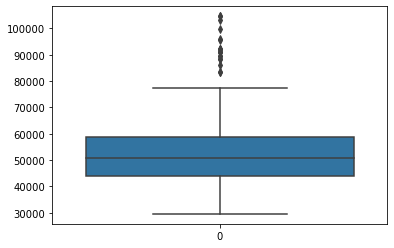

In [24]:
sns.boxplot(data=data['Income'])

Looking at the income of our customers, we can see most people making less than 60k/year, while our outliers are making more than 80k/year

C:\Users\nedal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Miles', ylabel='Density'>

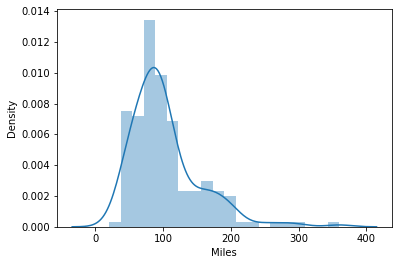

In [25]:
sns.distplot(data['Miles'])

<AxesSubplot:>

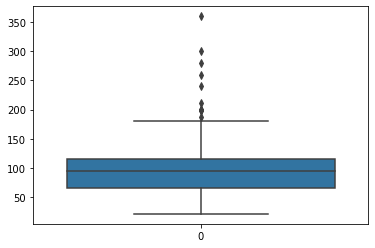

In [26]:
sns.boxplot(data=data['Miles'])

Univariate Analysis on the Miles feature reveals a median distance of 100 miles with outliers looking to run more than 200 miles.

MULTIVARIATE ANALYSIS:


We will begin by looking for correlations between numeric variables and plotting scatters for all numeric variable combinations,followed by a heat map which highlights areas of high correlation.

In [27]:
data.corr() #generates correlation coefficients between numeric variables

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


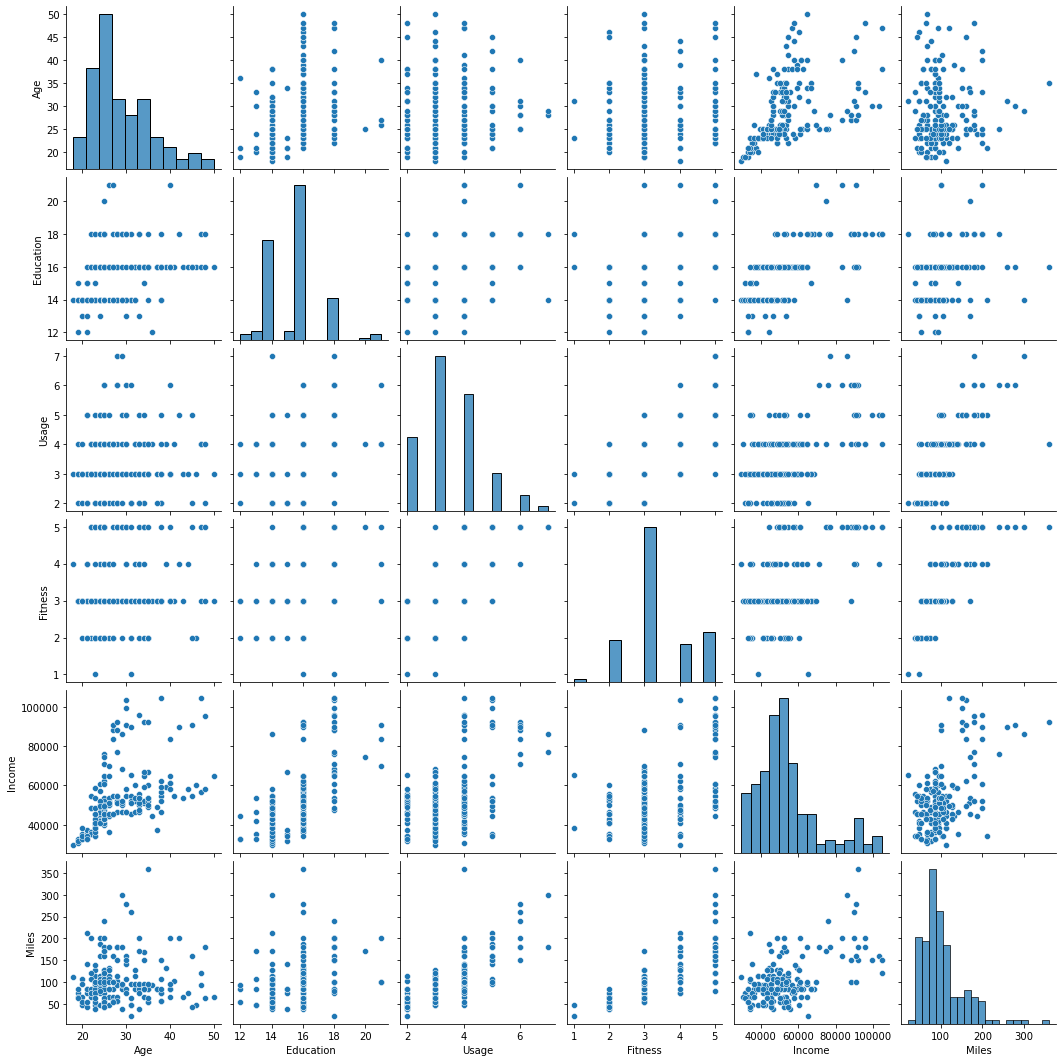

In [28]:
sns.pairplot(data) #generates scatterplots between all numeric variables

<AxesSubplot:>

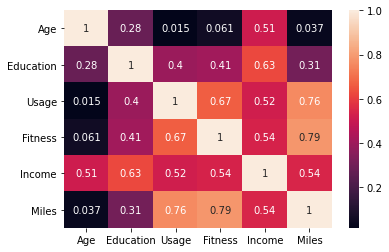

In [29]:
sns.heatmap(data.corr(), annot=True) #a color coded correlation map

From the heatmap we can see a positive correlation between education and income, fitness and usage, Usage and miles, and fitness and miles. 
The correlation between education and income is an obvious outcome of society. People with more education tend to earn more money.
The correlation between fitness and usage indicates that customers of the company that have higher fitness in general intend to use the product they purchased from the company more frequently.
The corellation between Usage and Miles indicates that people who intend to use the treadmill more days a week also intend to run more miles overall.
The correlation between fitness and miles indicates that the more fit a person is, the more likely they are to run more miles

I will start by plotting a joint plot for each of these correlations:

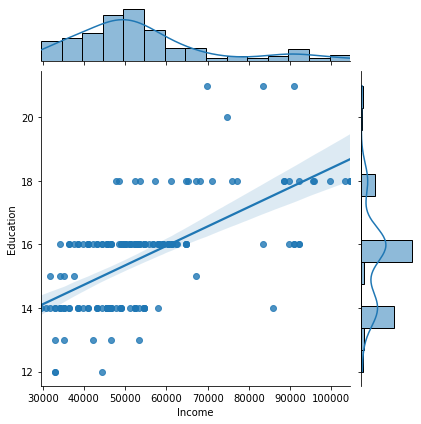

In [30]:
sns.jointplot(data = data, x = 'Income', y = 'Education',kind="reg");
#viewing the linear relationship between income and education

Here we can see the correlation between education and income. The KDE indicates that the most filled bin between education and income is someone educated 16 years making about $50k/year

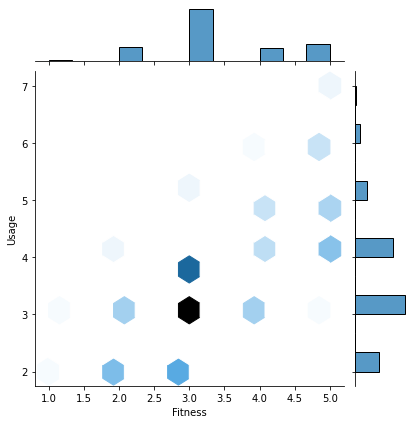

In [31]:
sns.jointplot(data = data, x = 'Fitness', y = 'Usage',kind="hex");
#hex was used to showcase the most popular bin

The most filled bin between fitness and usage is average=3 for both features, indicating a person with average fitness using the treadmill 3 times a week, you can see a trend as fitness increases so does usage.

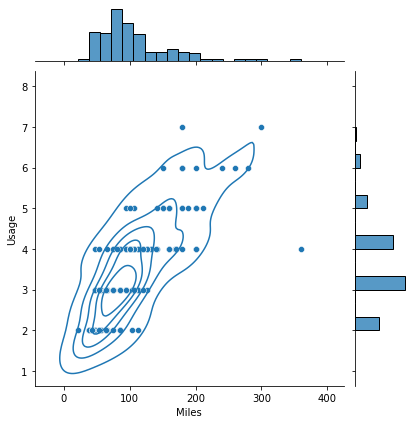

In [32]:
sns.jointplot(data = data, x = 'Miles', y = 'Usage').plot_joint(sns.kdeplot,n_levels=6);
#a kde plot with 6 levels featuring histograms

The most filled bin between Miles and Usage indicates customers running about 75 miles over 3 days of use. You can once again see the trend as Usage increases so does miles. 

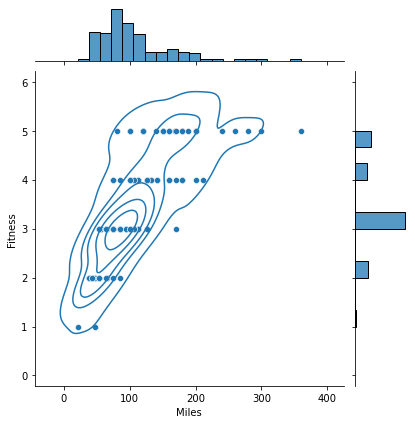

In [33]:
sns.jointplot(data = data, x = 'Miles', y = 'Fitness').plot_joint(sns.kdeplot,n_levels=6);
#a kde plot with 6 levels featuring histograms

Similarly to the plot above, we can see that as fitness increases so does  miles run. Our outliers hardly appear here, as very faint hexs in the upper right. The most filled bin indicates an average fitness customer running about 100 miles.


Now that we have looked into those correlations, we should continue trying to differentiate customer profiles per product purchased. First, we will consider the Age feature.

<AxesSubplot:ylabel='Age'>

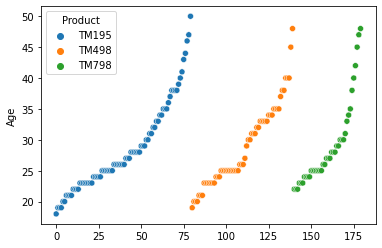

In [34]:
sns.scatterplot(x=data.index, y=data['Age'],hue=data['Product'])
#x chosen as index to avoid overlapping datapoints

Observation: Here we can see that the youngest people dont seem interested in buying the TM798, most probably due to cost

Now we can consider gender:

<AxesSubplot:xlabel='Age', ylabel='Gender'>

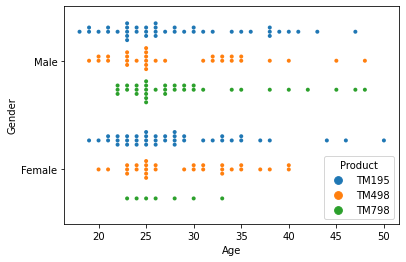

In [35]:
sns.swarmplot(x=data['Age'], y=data['Gender'],hue=data['Product'],size=4,dodge=True)
#dodge=true sorts the hue and plots it accordingly

Observation: This plot allows us to see that almost only men buy the TM798 while the TM195 and the TM498 tend to be bought by both sexes frequently

Now we can consider education:

<AxesSubplot:ylabel='Education'>

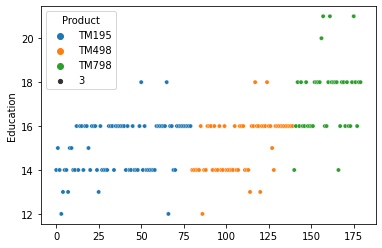

In [36]:
sns.scatterplot(x=data.index, y=data['Education'],hue=data['Product'],size=3)
#plotting the index on the X-axis to avoid overlapping datapoints
#changing size of plotted points to 3 to avoid overlapping

We can see that the average height of a green dot indicating the TM798 is higher than the other two treadmill models. This tells us that more educated people tend to buy the TM798. earlier we saw a relationship between income and education, so we expect the same trend when we plot the income. Let's do that next

<AxesSubplot:xlabel='Gender', ylabel='Income'>

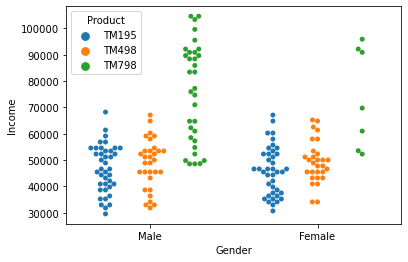

In [37]:
sns.swarmplot(x=data['Gender'], y=data['Income'],hue=data['Product'],dodge=True)
#dodge=true sorts the hue and plots it accordingly

Observation:
More educated (and wealthier because of the positive correlation between education and income) people tend to purchase the TM798. this plot also reiterates the fact that these customers are mostly men as well.

<AxesSubplot:xlabel='Age', ylabel='MaritalStatus'>

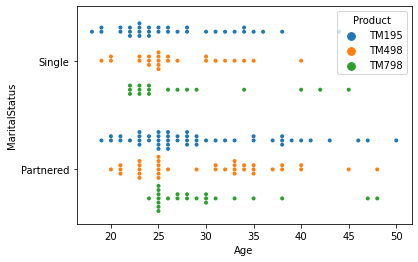

In [38]:
sns.swarmplot(x=data['Age'], y=data['MaritalStatus'],hue=data['Product'],size=4,dodge=True)
#dodge=true sorts the hue and plots it accordingly

When considering marital status, no trend is evident. The distribution among products seems random.

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

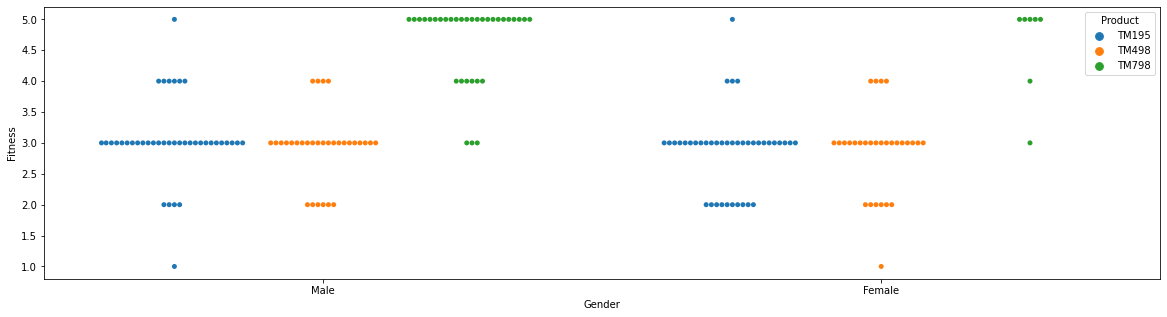

In [39]:
plt.figure(figsize=(20, 5)) #making figure wider to avoid overlapping of data points,
#this allows me to increase size
sns.swarmplot(x=data['Gender'], y=data['Fitness'],hue=data['Product'], size=5,dodge=True)
#dodge=true sorts the hue and plots it accordingly

This plot shows us that more men than women rate themselves as highly fit individuals. Among highly fit men and women, it is evident that the TM798 is the preferred option. It is hard to find a distinction between the TM195 and the TM498 based on fitness, both seem fairly popular among less fit people

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

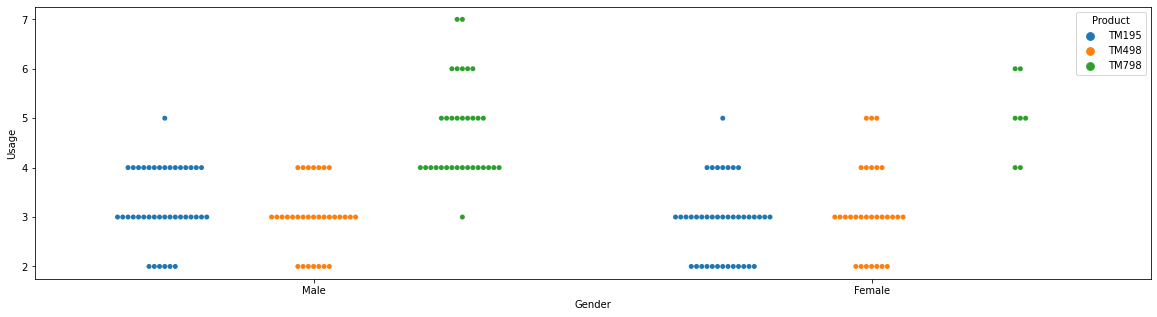

In [40]:
plt.figure(figsize=(20,5))#making figure wider to avoid overlapping of data points,
#this allows me to increase size
sns.swarmplot(x=data['Gender'], y=data['Usage'],hue=data['Product'],size=5,dodge=True)
#dodge=true sorts the hue and plots it accordingly

Oberservation: People who have high fitness and desire high usage tend to opt for the TM798 model of treadmill. The TM798 is often predominantly bought by men.

There once again isn't a visible distinction between the TM195 and the TM 498 varieties based on customer usage

From the above two plots it is evident that people who take running seriously(have a high fitness level and intend to use the treadmill frequently) tend to opt for the TM798. I wonder why some really fit people dont use the TM798 and buy the TM195/TM498 instead. I will try to look up the income of these specific data points.

In [41]:
data.sort_values(by='Fitness',ascending=False).head(40)
#the top 40 most fit customers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
179,TM798,48,Male,18,Partnered,4,5,95508,180
146,TM798,24,Male,16,Single,4,5,61006,100
148,TM798,24,Female,16,Single,5,5,52291,200
149,TM798,24,Male,16,Single,5,5,49801,160
150,TM798,25,Male,16,Partnered,4,5,49801,120
145,TM798,23,Male,16,Single,4,5,48556,100
152,TM798,25,Female,18,Partnered,5,5,61006,200
155,TM798,25,Male,18,Partnered,6,5,75946,240
23,TM195,24,Female,16,Partnered,5,5,44343,188
156,TM798,25,Male,20,Partnered,4,5,74701,170


In [42]:
grouped_data=data.groupby('Product')
grouped_data.describe()
#a description based on each treadmill

Age                                                  Education  \
        count   mean       std   min    25%   50%    75%   max     count   
Product                                                                    
TM195    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0      80.0   
TM498    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0      60.0   
TM798    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0      40.0   

                    ...   Income           Miles                               \
              mean  ...      75%       max count        mean        std   min   
Product             ...                                                         
TM195    15.037500  ...  53439.0   68220.0  80.0   82.787500  28.874102  38.0   
TM498    15.116667  ...  53439.0   67083.0  60.0   87.933333  33.263135  21.0   
TM798    17.325000  ...  90886.0  104581.0  40.0  166.900000  60.066544  80.0   

                                     
           25%    50%    75%    max  
Product                              
TM195     66.0   85.0   94.0  188.0  
TM498     64.0   85.0  106.0  212.0  
TM798    120.0  160.0  200.0  360.0  

[3 rows x 48 columns]

In [43]:
#Find average income of people who purchase TM798 vs other models
data.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

From the top 30 most fit customers we can see that only two didn't buy the TM798 and they bought the TM195 instead. At index 23 we have a female with an income of 44k, which is much lower than the average income of people who purchase the TM798. And at index 61 we have a male with an income of 51k. Therefore we can conclude that cost barries kept these customers from purchasing the TM798. 
When looking in the top 40, we see a similar trend emerge where people tend to opt for the TM498/TM195 and these people all have a lower income

<AxesSubplot:xlabel='Age', ylabel='Income'>

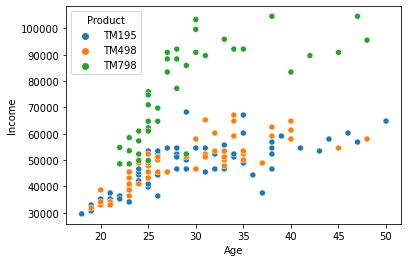

In [44]:
sns.scatterplot(x=data['Age'], y=data['Income'],hue=data['Product'])

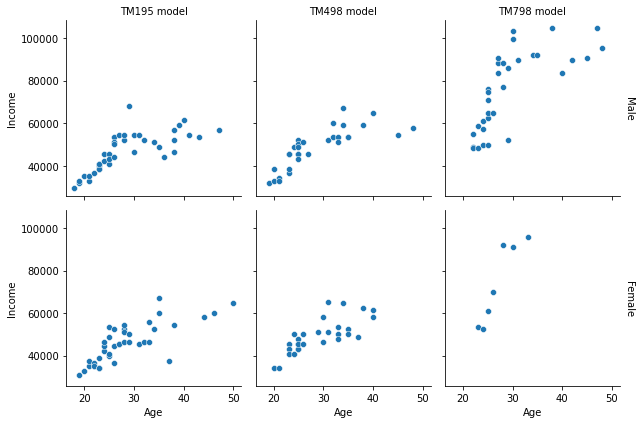

In [45]:
g = sns.FacetGrid(data, col="Product", row="Gender", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="Age", y="Income")
g.set_axis_labels("Age", "Income")
g.set_titles(col_template="{col_name} model", row_template="{row_name}")
g.tight_layout()
#creating a facet grid for easier comparison

Observation: The TM798 also seems to appeal to the wealthier customers as well. People who can afford it tend to opt for this model, while others settle for a presumably cheaper model. 

I will now do a similar spot check however on the people running the most miles. The purpose of this is to see why someone running so many miles would not buy the TM798, and before we even look we suspect it has to do with the persons income.

In [46]:
data.sort_values(by='Miles',ascending=False).head(15)
#the 15 customers who run the most

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,TM798,35,Male,16,Partnered,4,5,92131,360
166,TM798,29,Male,14,Partnered,7,5,85906,300
167,TM798,30,Female,16,Partnered,6,5,90886,280
170,TM798,31,Male,16,Partnered,6,5,89641,260
155,TM798,25,Male,18,Partnered,6,5,75946,240
84,TM498,21,Female,14,Partnered,5,4,34110,212
152,TM798,25,Female,18,Partnered,5,5,61006,200
176,TM798,42,Male,18,Single,5,4,89641,200
175,TM798,40,Male,21,Single,6,5,83416,200
142,TM798,22,Male,18,Single,4,5,48556,200


<AxesSubplot:xlabel='Age', ylabel='Miles'>

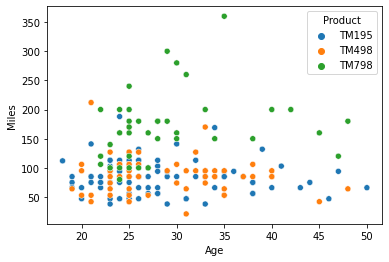

In [47]:
sns.scatterplot(x=data['Age'], y=data['Miles'],hue=data['Product'])

Here we can see an orange dot in the top left. This indicates a person who runs a lot buy the TM 498. Looking into the sorted data frame above we can see this person is a female making only $34k/year. This supports the claim that if fit people can afford it, they will tend to opt for the TM798, however, if not they opt for a cheaper option

I have included the box plots below to showcase the distinction of the TM798 model and also analyze any possible distinction between the TM195 and the TM498 below

<AxesSubplot:xlabel='Product', ylabel='Usage'>

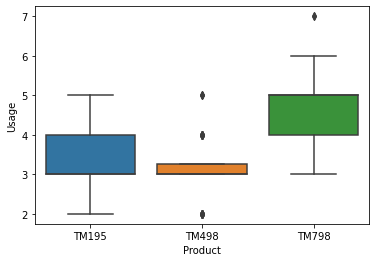

In [48]:
sns.boxplot(x=data['Product'],y=data['Usage'])

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

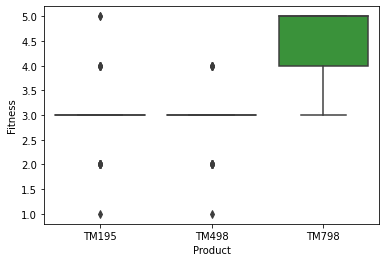

In [49]:
sns.boxplot(x=data['Product'],y=data['Fitness'])

<AxesSubplot:xlabel='Product', ylabel='Miles'>

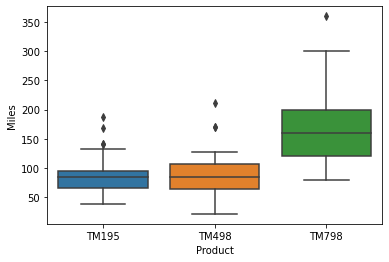

In [50]:
sns.boxplot(x=data['Product'],y=data['Miles'])

<AxesSubplot:xlabel='Product', ylabel='Income'>

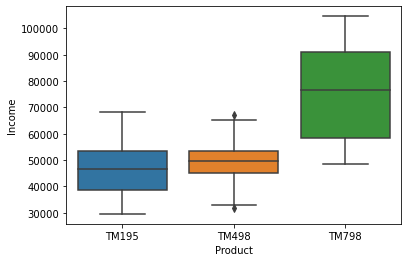

In [51]:
sns.boxplot(x=data['Product'],y=data['Income'])

Oberservation:
From the above boxplots it is evident that the people buying the TM798 are wealthier, in better shape already, and desire to run more frequently frequently for on average more miles

The only distinction I can see between the TM195 purchasers and the TM498 purchasers is that the TM195 customers have a larger income range and appeal to more people looking for higher usage. We can see that in the first plot, The usage for the TM195 includes many people looking to run 4 times a week while people buying th TM498 want to run only about 3 days a week in general.

The rest of the multivariate analysis will focus on finding a possible distinction between the TM195 and the TM498, as the customer profile for the TM798 has essentially been determinded at this point.

<AxesSubplot:xlabel='Product', ylabel='Age'>

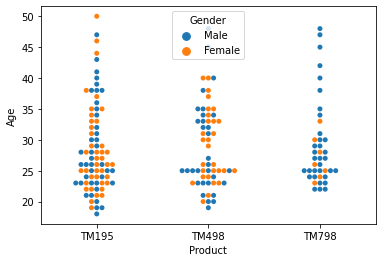

In [52]:
sns.swarmplot(x=data['Product'], y=data['Age'],hue=data['Gender'])

We can see that neither age nor gender affects product selection between the TM195 and TM498

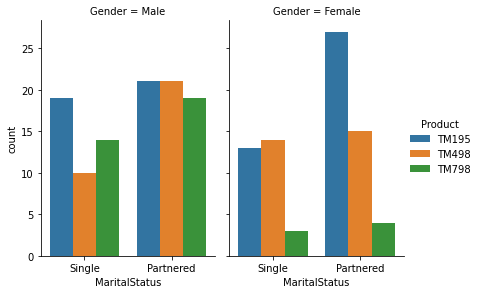

In [53]:
sns.catplot(x='MaritalStatus', hue='Product', col='Gender',
                data=data, kind='count',
                height=4, aspect=.7);
#a side by side comparisons and gender and relationship status

This plot seems to indicate that single men have a slight preference for the TM195 while single women have a slight preference for the TM498. However, partnered females tend to opt for the TM195. If in a partnered household both partners will use the treadmill, this indicates to me that the TM195 is a more general model and preferred by a larger variety of people. 

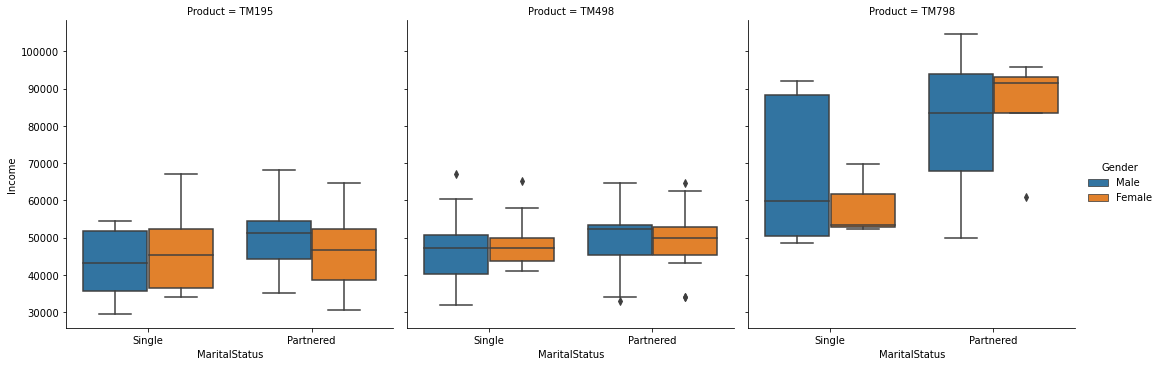

In [54]:
sns.catplot(x="MaritalStatus", #x axis variable currently considered
               y = "Income", #y axis variable
               hue="Gender", #color coding 
               col="Product", #each treadmill in its own plot
               data=data, 
               kind="box"); #make a boxplot

This plot shows us that the lowest income people tend to opt for the TM195. This leads me to believe it is the base model and generalizes to the most people's needs while also being affordable. I will make the same plot with x being the usage and fitness now.

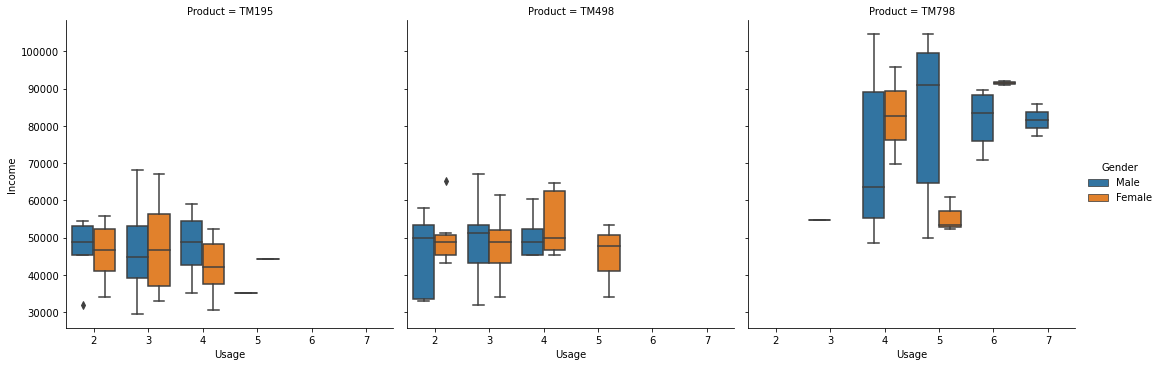

In [55]:
sns.catplot(x="Usage",
               y = "Income",
               hue="Gender", 
               col="Product", 
               data=data, 
               kind="box");

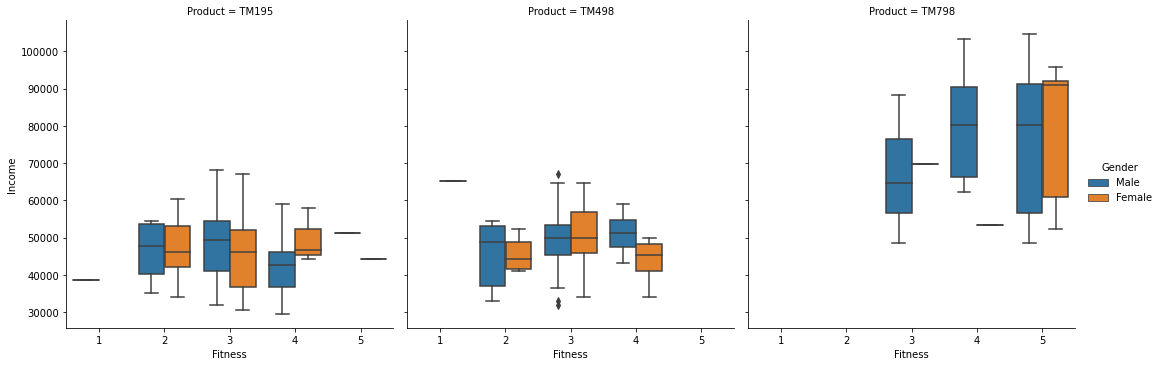

In [56]:
sns.catplot(x="Fitness",
               y = "Income",
               hue="Gender", 
               col="Product", 
               data=data, 
               kind="box");

From these plots it appears that the spread is very similar for the TM195 and TM498 amongst the Fitness and Usage variables. Marital Status doesn't seem to have any affect on customer decision either. From all of these plots the common theme is that the people who purchase TM498 model have a higher income, but only slightly. This reinforces my thought of the TM195 being a base model.

Conclusions and Recommendations:

From my analysis I have determined a clear distinction between the TM798 and the other two models.
People who buy the TM798 have a higher income and intend to use the product much more. These people are typically men who are already fit and looking to maintain their fitness with moderate or higher exercise. 

Based on this I would reccommend marketing the TM798 to higher income men and women who are interested in personal health.

My analysis also lead me to determine only a minor distinction between the customers buying the TM195 and the TM498. This distinction is that the income of people buying the TM 498 have only a slightly higher income than those purchasing the TM195. It is also preferred by Single Female Customers. 

Based on this I would reccommend marketing the TM195 towards lower income men and the TM498 to lower income women.